In [1]:
import DORA
# import numpy as np
# import pandas as pd
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import os
# import itertools

In [2]:
#universal parameters
file_name = '00021.csv'  # 00086.csv or
pixel_size = 154  # in nanometers
time_step = 20  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = 100  # enter -1 to end at the last value of the data set
cmap = "spring" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
exp_tag = "Glycerol_50_Laser_50" # a tag that caries the name of the experiment
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y

#downsampling parameters
bin_size = 20  # bin size for downsample/filter processing
processing = "none"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
plot_type = "radius_filter"
#Graphing options:
    #Trajectory Maps:
        #2D: Colorful 2D visulization of the rotor from above
        #3D: 2D plot but time is an axis
    
    # Grid plot
        #grid: a grid of little snippets of the data
        
    #Angular Analysis
        #By Jerry
                #radius_filter: Demarcate the sus data points that will be eliminated from calculations
                #find_sus_angle: Indicate sus angles within angular_continuous by Jerry
                #angular_continuous_filtered: Angular Continuous recalculated with sus points filtered. Sus skips indicated.
                #basal3: Graphs tailored for the basal graph analysis 3/14/2022
                    #Angular Continuous with a downsampled curve as well. still has bugs with error labelling



    ############################### these have not been converted yet:
        #By Claire:
                #angular: angle vs time, but it's not cummulative and resets at 360 to 0 (Claire)
                #angular_continuous: Claire's Calculation of a cummulative angle
                #find_sus_angle_CR: Indicate sus angles within angular_continuous by Claire's calculations

    #Animation
        #interactive: Interactive graph
        #animated: animated trajectory in notebook
        #HTML: Animated trajectory in a new window. May run better

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find sus angle
display_center = "yes"

#Labels
title = "RecBCD.csv"
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'no'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter

#       Formatting parameters for 'angular_continuous_filtered' plot
# enter 'line' or 'scatter' for a line graph or a scatter plot. Line plot makes up points when hovered
graph_style = 'line'


#Formatting parameters 'grid' plot
frames_per_plot = 195  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= "G50L50_4.20.2022_"
name_saving_folder = "saving_folder"


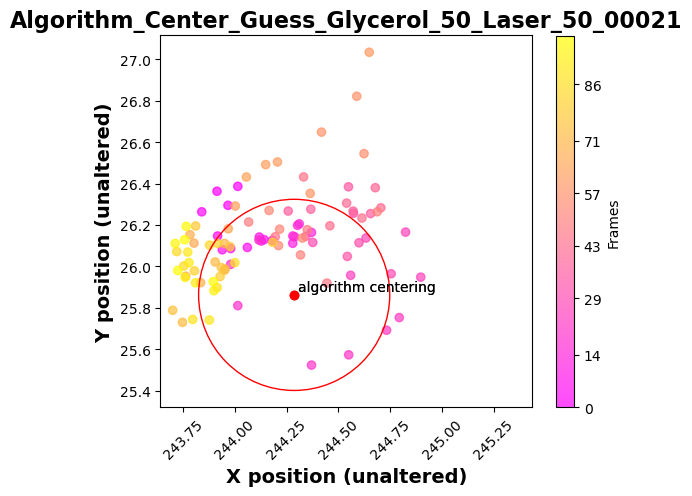

The center is (244.28684623873963, 25.862472105999384)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


In [3]:
initial_parameters = [file_name,time_step, frame_start, frame_end, cmap, exp_tag,first_zero_end]
center, data, ind_invalid_reading, data_back = DORA.find_center(*initial_parameters)





In [4]:
downsample_parameters = [bin_size, processing, data, center, time_step, pixel_size, frame_start, frame_end]
down_sampled_df = DORA.downsample(*downsample_parameters)

end


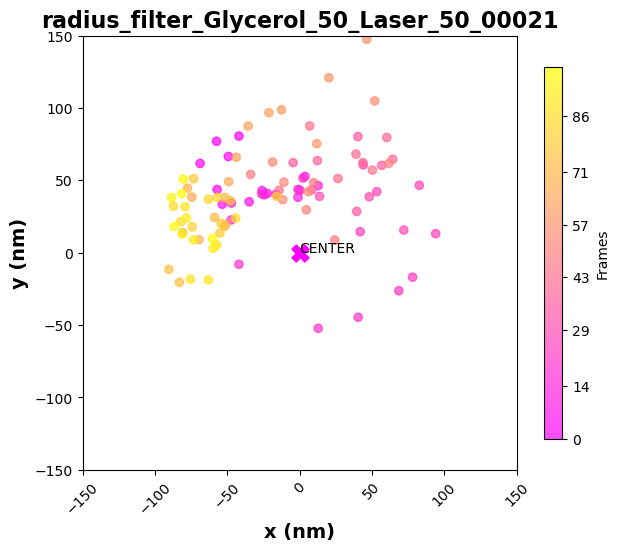

In [5]:
#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, title, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag]

#Angle Versus Time (AVT or avt) parameters:
avt_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, title, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap,exp_tag] 

DORA.graph(plot_type,*avt_parameters)